# TSI forecasting pipeline's final function: rnn(P,T)

#### This is a copy of the final function of TSI forecasting pipeline, which trains a Recurrent Neural Network (NN), that can be overplaced with another NN ou forecasting tool. 

#### On this time this function was costumized for the ICCSA2020 work purpose.

In [2]:
from library import *

Using TensorFlow backend.


In [ ]:
Loading the input and the output data provided as results from the function model_

In [9]:
P = np.asarray(np.loadtxt('P_PY.csv'))
T = np.asarray(np.loadtxt('T_PY.csv'))

In [16]:
T=T.reshape(-1, 1)

In [17]:
T.shape

(119, 1)

In [65]:
# normalize the dataset

scaler = StandardScaler()
#scaler = MinMaxScaler()

pn = scaler.fit_transform(P)
tn = scaler.fit_transform(T)

#pn = (P - np.nanmean(P, axis=0))/np.nanstd(P, axis=0) 
#tn = (T - np.nanmean(T))/np.nanstd(T)

In [67]:
#print('\nArquivos salvos em '+path+' :\n')
#np.savetxt(path+'\\pn_PY.csv', pn)
#print('pn_PY.csv\n')

#np.savetxt(path+'\\tn_PY.csv', tn)
#print('tn_PY.csv\n')

pn = np.transpose(pn)
pn.shape

(119, 40)

In [142]:

xTrain, xTest, yTrain, yTest= train_test_split(pn, tn, test_size=0.2, shuffle=True)

#xTrain = xTrain.reshape((xTrain.shape[0], 1, xTrain.shape[1]))
#xTest = xTest.reshape((xTest.shape[0], 1, xTest.shape[1]))

seriesSize = len(tn)
trainSize = int(seriesSize*0.85)
testSize = seriesSize - trainSize

#xTrain, xTest = pn[:trainSize,:], pn[trainSize:,:] 
#yTrain, yTest = tn[:trainSize], tn[trainSize:]

xTrain = xTrain.reshape((xTrain.shape[0], 1, xTrain.shape[1]))
xTest = xTest.reshape((xTest.shape[0], 1, xTest.shape[1]))


In [217]:
units = 1
input_shape = xTrain.shape[1],xTrain.shape[2]
epochs = 300
batch_size=5
#dropout=0.1

In [218]:
model = Sequential()
model.add(LSTM(units=units, input_shape=input_shape))
model.add(Dropout(dropout))
model.add(Dense(1))
#model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

f = model.fit(xTrain, yTrain, epochs=epochs, batch_size=batch_size, validation_data=(xTest,yTest))

Train on 95 samples, validate on 24 samples
Epoch 1/300
95/95 [==============================] - 30s 320ms/step - loss: 1.0204 - val_loss: 0.9709
Epoch 2/300
95/95 [==============================] - 0s 3ms/step - loss: 1.0092 - val_loss: 0.9688
Epoch 3/300
95/95 [==============================] - 0s 4ms/step - loss: 1.0036 - val_loss: 0.9667
Epoch 4/300
95/95 [==============================] - 0s 4ms/step - loss: 1.0011 - val_loss: 0.9605
Epoch 5/300
95/95 [==============================] - 0s 4ms/step - loss: 0.9878 - val_loss: 0.9556
Epoch 6/300
95/95 [==============================] - 0s 4ms/step - loss: 0.9733 - val_loss: 0.9503
Epoch 7/300
95/95 [==============================] - 0s 4ms/step - loss: 0.9605 - val_loss: 0.9475
Epoch 8/300
95/95 [==============================] - 0s 4ms/step - loss: 0.9329 - val_loss: 0.9439
Epoch 9/300
95/95 [==============================] - 0s 4ms/step - loss: 0.9069 - val_loss: 0.9481
Epoch 10/300
95/95 [==============================] - 0s 4ms/s

95/95 [==============================] - 1s 6ms/step - loss: 0.3878 - val_loss: 0.6243
Epoch 83/300
95/95 [==============================] - 0s 5ms/step - loss: 0.4576 - val_loss: 0.6221
Epoch 84/300
95/95 [==============================] - 1s 6ms/step - loss: 0.4140 - val_loss: 0.6304
Epoch 85/300
95/95 [==============================] - 0s 4ms/step - loss: 0.4493 - val_loss: 0.6123
Epoch 86/300
95/95 [==============================] - 0s 4ms/step - loss: 0.4166 - val_loss: 0.6045
Epoch 87/300
95/95 [==============================] - 0s 4ms/step - loss: 0.4194 - val_loss: 0.6189
Epoch 88/300
95/95 [==============================] - 0s 4ms/step - loss: 0.3834 - val_loss: 0.6148
Epoch 89/300
95/95 [==============================] - 0s 4ms/step - loss: 0.4478 - val_loss: 0.6084
Epoch 90/300
95/95 [==============================] - 0s 5ms/step - loss: 0.3871 - val_loss: 0.6101
Epoch 91/300
95/95 [==============================] - 0s 5ms/step - loss: 0.3751 - val_loss: 0.6008
Epoch 92/300


95/95 [==============================] - 0s 4ms/step - loss: 0.3627 - val_loss: 0.4789
Epoch 164/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2895 - val_loss: 0.4643
Epoch 165/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2652 - val_loss: 0.4672
Epoch 166/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2908 - val_loss: 0.4666
Epoch 167/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2439 - val_loss: 0.4625
Epoch 168/300
95/95 [==============================] - 1s 6ms/step - loss: 0.3864 - val_loss: 0.4632
Epoch 169/300
95/95 [==============================] - 0s 4ms/step - loss: 0.3095 - val_loss: 0.4663
Epoch 170/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2028 - val_loss: 0.4642
Epoch 171/300
95/95 [==============================] - 0s 5ms/step - loss: 0.2585 - val_loss: 0.4502
Epoch 172/300
95/95 [==============================] - 0s 4ms/step - loss: 0.3563 - val_loss: 0.4596
Epoc

95/95 [==============================] - 0s 4ms/step - loss: 0.2056 - val_loss: 0.3599
Epoch 245/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2505 - val_loss: 0.3613
Epoch 246/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2541 - val_loss: 0.3523
Epoch 247/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2142 - val_loss: 0.3623
Epoch 248/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2709 - val_loss: 0.3527
Epoch 249/300
95/95 [==============================] - 0s 4ms/step - loss: 0.3198 - val_loss: 0.3540
Epoch 250/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2891 - val_loss: 0.3516
Epoch 251/300
95/95 [==============================] - 0s 3ms/step - loss: 0.2407 - val_loss: 0.3507
Epoch 252/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2723 - val_loss: 0.3411
Epoch 253/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2774 - val_loss: 0.3567
Epoc

In [204]:
mse = []
batchsize = []
units = []

# for i in range(5,51,5): usado para bacth_size
for i in range(1,20):
    #batch_size = int(trainSize*i/100)
    units = i
    model = Sequential()
    model.add(LSTM(units=units, input_shape=input_shape))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    #model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    f = model.fit(xTrain, yTrain, epochs=epochs, batch_size=batch_size, validation_data=(xTest,yTest))
    #mse.append([batch_size, f.history['loss'][-1], f.history['val_loss'][-1]])
    mse.append([units, f.history['loss'][-1], f.history['val_loss'][-1]])
    
np.savetxt('LSTMTests\\batchSizeTest_'+'batch_size'+str(batch_size)+'_'+str(epochs)+'epochs.csv',mse)
#np.savetxt('LSTMTests\\batchSizeTest_'+str(epochs)+'epochs.csv',mse)

Train on 95 samples, validate on 24 samples
Epoch 1/300
95/95 [==============================] - 27s 280ms/step - loss: 1.0092 - val_loss: 0.9446
Epoch 2/300
95/95 [==============================] - 0s 5ms/step - loss: 0.9986 - val_loss: 0.9428
Epoch 3/300
95/95 [==============================] - 0s 4ms/step - loss: 0.9913 - val_loss: 0.9386
Epoch 4/300
95/95 [==============================] - 0s 5ms/step - loss: 0.9780 - val_loss: 0.9347
Epoch 5/300
95/95 [==============================] - 0s 4ms/step - loss: 0.9664 - val_loss: 0.9293
Epoch 6/300
95/95 [==============================] - 0s 4ms/step - loss: 0.9496 - val_loss: 0.9250
Epoch 7/300
95/95 [==============================] - 0s 4ms/step - loss: 0.9080 - val_loss: 0.9239
Epoch 8/300
95/95 [==============================] - 0s 4ms/step - loss: 0.9015 - val_loss: 0.9247
Epoch 9/300
95/95 [==============================] - 1s 6ms/step - loss: 0.8605 - val_loss: 0.9249
Epoch 10/300
95/95 [==============================] - 1s 7ms/s

95/95 [==============================] - 0s 4ms/step - loss: 0.4447 - val_loss: 0.6104
Epoch 83/300
95/95 [==============================] - 0s 5ms/step - loss: 0.4728 - val_loss: 0.6281
Epoch 84/300
95/95 [==============================] - 0s 4ms/step - loss: 0.4069 - val_loss: 0.6170
Epoch 85/300
95/95 [==============================] - 0s 4ms/step - loss: 0.4848 - val_loss: 0.6075
Epoch 86/300
95/95 [==============================] - 0s 4ms/step - loss: 0.3871 - val_loss: 0.6089
Epoch 87/300
95/95 [==============================] - 0s 4ms/step - loss: 0.4082 - val_loss: 0.6021
Epoch 88/300
95/95 [==============================] - 0s 4ms/step - loss: 0.4115 - val_loss: 0.6043
Epoch 89/300
95/95 [==============================] - 0s 4ms/step - loss: 0.4070 - val_loss: 0.5978
Epoch 90/300
95/95 [==============================] - 0s 4ms/step - loss: 0.4267 - val_loss: 0.6024
Epoch 91/300
95/95 [==============================] - 0s 4ms/step - loss: 0.4307 - val_loss: 0.5934
Epoch 92/300


95/95 [==============================] - 0s 4ms/step - loss: 0.2286 - val_loss: 0.4725
Epoch 164/300
95/95 [==============================] - 0s 4ms/step - loss: 0.3187 - val_loss: 0.4842
Epoch 165/300
95/95 [==============================] - 0s 4ms/step - loss: 0.3123 - val_loss: 0.4802
Epoch 166/300
95/95 [==============================] - 0s 4ms/step - loss: 0.3113 - val_loss: 0.4662
Epoch 167/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2785 - val_loss: 0.4741
Epoch 168/300
95/95 [==============================] - 0s 5ms/step - loss: 0.2833 - val_loss: 0.4710
Epoch 169/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2514 - val_loss: 0.4752
Epoch 170/300
95/95 [==============================] - 0s 4ms/step - loss: 0.3705 - val_loss: 0.4679
Epoch 171/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2425 - val_loss: 0.4612
Epoch 172/300
95/95 [==============================] - 0s 5ms/step - loss: 0.3977 - val_loss: 0.4708
Epoc

95/95 [==============================] - 1s 7ms/step - loss: 0.2944 - val_loss: 0.4028
Epoch 245/300
95/95 [==============================] - 0s 5ms/step - loss: 0.3067 - val_loss: 0.3955
Epoch 246/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2194 - val_loss: 0.3989
Epoch 247/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2666 - val_loss: 0.4041
Epoch 248/300
95/95 [==============================] - 0s 5ms/step - loss: 0.2031 - val_loss: 0.3991
Epoch 249/300
95/95 [==============================] - 0s 5ms/step - loss: 0.2154 - val_loss: 0.3881
Epoch 250/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2160 - val_loss: 0.3900
Epoch 251/300
95/95 [==============================] - 0s 4ms/step - loss: 0.1852 - val_loss: 0.4033
Epoch 252/300
95/95 [==============================] - 0s 4ms/step - loss: 0.3306 - val_loss: 0.3867
Epoch 253/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2041 - val_loss: 0.3925
Epoc

Epoch 25/300
95/95 [==============================] - 0s 2ms/step - loss: 0.8697 - val_loss: 0.9313
Epoch 26/300
95/95 [==============================] - 0s 2ms/step - loss: 0.8517 - val_loss: 0.9302
Epoch 27/300
95/95 [==============================] - 0s 3ms/step - loss: 0.8667 - val_loss: 0.9298
Epoch 28/300
95/95 [==============================] - 0s 2ms/step - loss: 0.8379 - val_loss: 0.9273
Epoch 29/300
95/95 [==============================] - 0s 2ms/step - loss: 0.8459 - val_loss: 0.9244
Epoch 30/300
95/95 [==============================] - 0s 2ms/step - loss: 0.8475 - val_loss: 0.9222
Epoch 31/300
95/95 [==============================] - 0s 2ms/step - loss: 0.8203 - val_loss: 0.9216
Epoch 32/300
95/95 [==============================] - 0s 2ms/step - loss: 0.8031 - val_loss: 0.9204
Epoch 33/300
95/95 [==============================] - 0s 2ms/step - loss: 0.8209 - val_loss: 0.9189
Epoch 34/300
95/95 [==============================] - 0s 2ms/step - loss: 0.8224 - val_loss: 0.9171


Epoch 107/300
95/95 [==============================] - 0s 3ms/step - loss: 0.6145 - val_loss: 0.7913
Epoch 108/300
95/95 [==============================] - 0s 2ms/step - loss: 0.6000 - val_loss: 0.7891
Epoch 109/300
95/95 [==============================] - 0s 2ms/step - loss: 0.5339 - val_loss: 0.7869
Epoch 110/300
95/95 [==============================] - 0s 2ms/step - loss: 0.6503 - val_loss: 0.7853
Epoch 111/300
95/95 [==============================] - 0s 2ms/step - loss: 0.5729 - val_loss: 0.7833
Epoch 112/300
95/95 [==============================] - 0s 2ms/step - loss: 0.5980 - val_loss: 0.7809
Epoch 113/300
95/95 [==============================] - 0s 3ms/step - loss: 0.6044 - val_loss: 0.7784
Epoch 114/300
95/95 [==============================] - 0s 2ms/step - loss: 0.6215 - val_loss: 0.7763
Epoch 115/300
95/95 [==============================] - 0s 2ms/step - loss: 0.6041 - val_loss: 0.7746
Epoch 116/300
95/95 [==============================] - 0s 2ms/step - loss: 0.6265 - val_los

95/95 [==============================] - 0s 2ms/step - loss: 0.5298 - val_loss: 0.7170
Epoch 189/300
95/95 [==============================] - 0s 2ms/step - loss: 0.5171 - val_loss: 0.7163
Epoch 190/300
95/95 [==============================] - 0s 2ms/step - loss: 0.4465 - val_loss: 0.7161
Epoch 191/300
95/95 [==============================] - 0s 2ms/step - loss: 0.4400 - val_loss: 0.7157
Epoch 192/300
95/95 [==============================] - 0s 2ms/step - loss: 0.4270 - val_loss: 0.7163
Epoch 193/300
95/95 [==============================] - 0s 3ms/step - loss: 0.4878 - val_loss: 0.7160
Epoch 194/300
95/95 [==============================] - 0s 2ms/step - loss: 0.5171 - val_loss: 0.7158
Epoch 195/300
95/95 [==============================] - 0s 3ms/step - loss: 0.4579 - val_loss: 0.7160
Epoch 196/300
95/95 [==============================] - 0s 2ms/step - loss: 0.5130 - val_loss: 0.7146
Epoch 197/300
95/95 [==============================] - 0s 3ms/step - loss: 0.4141 - val_loss: 0.7147
Epoc

95/95 [==============================] - 0s 3ms/step - loss: 0.4215 - val_loss: 0.6643
Epoch 270/300
95/95 [==============================] - 0s 2ms/step - loss: 0.3894 - val_loss: 0.6632
Epoch 271/300
95/95 [==============================] - 0s 2ms/step - loss: 0.4995 - val_loss: 0.6624
Epoch 272/300
95/95 [==============================] - 0s 2ms/step - loss: 0.3756 - val_loss: 0.6629
Epoch 273/300
95/95 [==============================] - 0s 2ms/step - loss: 0.4124 - val_loss: 0.6625
Epoch 274/300
95/95 [==============================] - 0s 2ms/step - loss: 0.4232 - val_loss: 0.6610
Epoch 275/300
95/95 [==============================] - 0s 2ms/step - loss: 0.4292 - val_loss: 0.6617
Epoch 276/300
95/95 [==============================] - 0s 2ms/step - loss: 0.4464 - val_loss: 0.6637
Epoch 277/300
95/95 [==============================] - 0s 2ms/step - loss: 0.4737 - val_loss: 0.6619
Epoch 278/300
95/95 [==============================] - 0s 2ms/step - loss: 0.4456 - val_loss: 0.6571
Epoc

95/95 [==============================] - 0s 3ms/step - loss: 0.5922 - val_loss: 0.7741
Epoch 51/300
95/95 [==============================] - 0s 2ms/step - loss: 0.6011 - val_loss: 0.7663
Epoch 52/300
95/95 [==============================] - 0s 3ms/step - loss: 0.6235 - val_loss: 0.7661
Epoch 53/300
95/95 [==============================] - 0s 3ms/step - loss: 0.6257 - val_loss: 0.7605
Epoch 54/300
95/95 [==============================] - 0s 2ms/step - loss: 0.5649 - val_loss: 0.7538
Epoch 55/300
95/95 [==============================] - 0s 2ms/step - loss: 0.5866 - val_loss: 0.7491
Epoch 56/300
95/95 [==============================] - 0s 2ms/step - loss: 0.5480 - val_loss: 0.7495
Epoch 57/300
95/95 [==============================] - 0s 2ms/step - loss: 0.5889 - val_loss: 0.7471
Epoch 58/300
95/95 [==============================] - 0s 2ms/step - loss: 0.5597 - val_loss: 0.7503
Epoch 59/300
95/95 [==============================] - 0s 2ms/step - loss: 0.6498 - val_loss: 0.7459
Epoch 60/300


95/95 [==============================] - 0s 2ms/step - loss: 0.3380 - val_loss: 0.5823
Epoch 132/300
95/95 [==============================] - 0s 2ms/step - loss: 0.4125 - val_loss: 0.5887
Epoch 133/300
95/95 [==============================] - 0s 1ms/step - loss: 0.4107 - val_loss: 0.5950
Epoch 134/300
95/95 [==============================] - 0s 2ms/step - loss: 0.3767 - val_loss: 0.5971
Epoch 135/300
95/95 [==============================] - 0s 1ms/step - loss: 0.3692 - val_loss: 0.5881
Epoch 136/300
95/95 [==============================] - 0s 2ms/step - loss: 0.3972 - val_loss: 0.5799
Epoch 137/300
95/95 [==============================] - 0s 1ms/step - loss: 0.3921 - val_loss: 0.5764
Epoch 138/300
95/95 [==============================] - 0s 2ms/step - loss: 0.3943 - val_loss: 0.5827
Epoch 139/300
95/95 [==============================] - 0s 2ms/step - loss: 0.4029 - val_loss: 0.5801
Epoch 140/300
95/95 [==============================] - 0s 2ms/step - loss: 0.3788 - val_loss: 0.5777
Epoc

95/95 [==============================] - 0s 2ms/step - loss: 0.3194 - val_loss: 0.4767
Epoch 213/300
95/95 [==============================] - 0s 2ms/step - loss: 0.3338 - val_loss: 0.4732
Epoch 214/300
95/95 [==============================] - 0s 1ms/step - loss: 0.3300 - val_loss: 0.4710
Epoch 215/300
95/95 [==============================] - 0s 3ms/step - loss: 0.2856 - val_loss: 0.4752
Epoch 216/300
95/95 [==============================] - 0s 2ms/step - loss: 0.3520 - val_loss: 0.4854
Epoch 217/300
95/95 [==============================] - 0s 3ms/step - loss: 0.2875 - val_loss: 0.4797
Epoch 218/300
95/95 [==============================] - 0s 3ms/step - loss: 0.3683 - val_loss: 0.4684
Epoch 219/300
95/95 [==============================] - 0s 3ms/step - loss: 0.3309 - val_loss: 0.4660
Epoch 220/300
95/95 [==============================] - 0s 2ms/step - loss: 0.3105 - val_loss: 0.4725
Epoch 221/300
95/95 [==============================] - 0s 3ms/step - loss: 0.2344 - val_loss: 0.4777
Epoc

95/95 [==============================] - 0s 2ms/step - loss: 0.2956 - val_loss: 0.3855
Epoch 294/300
95/95 [==============================] - 0s 3ms/step - loss: 0.2593 - val_loss: 0.3852
Epoch 295/300
95/95 [==============================] - 0s 2ms/step - loss: 0.2560 - val_loss: 0.3845
Epoch 296/300
95/95 [==============================] - 0s 2ms/step - loss: 0.3805 - val_loss: 0.3922
Epoch 297/300
95/95 [==============================] - 0s 2ms/step - loss: 0.2989 - val_loss: 0.3973
Epoch 298/300
95/95 [==============================] - 0s 2ms/step - loss: 0.2428 - val_loss: 0.3929
Epoch 299/300
95/95 [==============================] - 0s 2ms/step - loss: 0.3119 - val_loss: 0.3878
Epoch 300/300
95/95 [==============================] - 0s 1ms/step - loss: 0.2563 - val_loss: 0.3892
Train on 95 samples, validate on 24 samples
Epoch 1/300
95/95 [==============================] - 39s 406ms/step - loss: 1.0298 - val_loss: 0.9781
Epoch 2/300
95/95 [==============================] - 0s 2ms/

95/95 [==============================] - 0s 2ms/step - loss: 0.9528 - val_loss: 0.9872
Epoch 75/300
95/95 [==============================] - 0s 2ms/step - loss: 0.9578 - val_loss: 0.9876
Epoch 76/300
95/95 [==============================] - 0s 1ms/step - loss: 0.9537 - val_loss: 0.9873
Epoch 77/300
95/95 [==============================] - 0s 1ms/step - loss: 0.9639 - val_loss: 0.9866
Epoch 78/300
95/95 [==============================] - 0s 1ms/step - loss: 0.9491 - val_loss: 0.9857
Epoch 79/300
95/95 [==============================] - 0s 1ms/step - loss: 0.9648 - val_loss: 0.9847
Epoch 80/300
95/95 [==============================] - 0s 1ms/step - loss: 0.9468 - val_loss: 0.9841
Epoch 81/300
95/95 [==============================] - 0s 1ms/step - loss: 0.9569 - val_loss: 0.9832
Epoch 82/300
95/95 [==============================] - 0s 1ms/step - loss: 0.9503 - val_loss: 0.9837
Epoch 83/300
95/95 [==============================] - 0s 1ms/step - loss: 0.9594 - val_loss: 0.9820
Epoch 84/300


95/95 [==============================] - 0s 1ms/step - loss: 0.8479 - val_loss: 0.8233
Epoch 156/300
95/95 [==============================] - 0s 1ms/step - loss: 0.8371 - val_loss: 0.8197
Epoch 157/300
95/95 [==============================] - 0s 1ms/step - loss: 0.8324 - val_loss: 0.8122
Epoch 158/300
95/95 [==============================] - 0s 1ms/step - loss: 0.8571 - val_loss: 0.8056
Epoch 159/300
95/95 [==============================] - 0s 1ms/step - loss: 0.8497 - val_loss: 0.8074
Epoch 160/300
95/95 [==============================] - 0s 915us/step - loss: 0.8295 - val_loss: 0.8071
Epoch 161/300
95/95 [==============================] - 0s 989us/step - loss: 0.8481 - val_loss: 0.8087
Epoch 162/300
95/95 [==============================] - 0s 1ms/step - loss: 0.8388 - val_loss: 0.8049
Epoch 163/300
95/95 [==============================] - 0s 873us/step - loss: 0.8314 - val_loss: 0.7993
Epoch 164/300
95/95 [==============================] - 0s 873us/step - loss: 0.8626 - val_loss: 0.7

95/95 [==============================] - 0s 1ms/step - loss: 0.6828 - val_loss: 0.7078
Epoch 236/300
95/95 [==============================] - 0s 1ms/step - loss: 0.6892 - val_loss: 0.7063
Epoch 237/300
95/95 [==============================] - 0s 3ms/step - loss: 0.7210 - val_loss: 0.7050
Epoch 238/300
95/95 [==============================] - 0s 2ms/step - loss: 0.6746 - val_loss: 0.7047
Epoch 239/300
95/95 [==============================] - 0s 1ms/step - loss: 0.6867 - val_loss: 0.7023
Epoch 240/300
95/95 [==============================] - 0s 1ms/step - loss: 0.7122 - val_loss: 0.7018
Epoch 241/300
95/95 [==============================] - 0s 1ms/step - loss: 0.6893 - val_loss: 0.7001
Epoch 242/300
95/95 [==============================] - 0s 2ms/step - loss: 0.6889 - val_loss: 0.6980
Epoch 243/300
95/95 [==============================] - 0s 2ms/step - loss: 0.6605 - val_loss: 0.6991
Epoch 244/300
95/95 [==============================] - 0s 5ms/step - loss: 0.7017 - val_loss: 0.6982
Epoc

95/95 [==============================] - 0s 1ms/step - loss: 0.9951 - val_loss: 0.9713
Epoch 16/300
95/95 [==============================] - 0s 989us/step - loss: 0.9922 - val_loss: 0.9717
Epoch 17/300
95/95 [==============================] - 0s 1ms/step - loss: 0.9883 - val_loss: 0.9712
Epoch 18/300
95/95 [==============================] - 0s 939us/step - loss: 0.9937 - val_loss: 0.9702
Epoch 19/300
95/95 [==============================] - 0s 1ms/step - loss: 0.9869 - val_loss: 0.9683
Epoch 20/300
95/95 [==============================] - 0s 789us/step - loss: 0.9795 - val_loss: 0.9672
Epoch 21/300
95/95 [==============================] - 0s 978us/step - loss: 0.9830 - val_loss: 0.9662
Epoch 22/300
95/95 [==============================] - 0s 820us/step - loss: 0.9793 - val_loss: 0.9638
Epoch 23/300
95/95 [==============================] - 0s 904us/step - loss: 0.9742 - val_loss: 0.9628
Epoch 24/300
95/95 [==============================] - 0s 894us/step - loss: 0.9709 - val_loss: 0.9622

95/95 [==============================] - 0s 2ms/step - loss: 0.7492 - val_loss: 0.8042
Epoch 97/300
95/95 [==============================] - 0s 1ms/step - loss: 0.7111 - val_loss: 0.8028
Epoch 98/300
95/95 [==============================] - 0s 1ms/step - loss: 0.7158 - val_loss: 0.8010
Epoch 99/300
95/95 [==============================] - 0s 1ms/step - loss: 0.7338 - val_loss: 0.7997
Epoch 100/300
95/95 [==============================] - 0s 1ms/step - loss: 0.7045 - val_loss: 0.7981
Epoch 101/300
95/95 [==============================] - 0s 1ms/step - loss: 0.7045 - val_loss: 0.7982
Epoch 102/300
95/95 [==============================] - 0s 1ms/step - loss: 0.7259 - val_loss: 0.7971
Epoch 103/300
95/95 [==============================] - 0s 915us/step - loss: 0.7297 - val_loss: 0.7971
Epoch 104/300
95/95 [==============================] - 0s 2ms/step - loss: 0.7429 - val_loss: 0.7935
Epoch 105/300
95/95 [==============================] - 0s 2ms/step - loss: 0.6995 - val_loss: 0.7903
Epoch

95/95 [==============================] - 0s 968us/step - loss: 0.5460 - val_loss: 0.6524
Epoch 178/300
95/95 [==============================] - 0s 926us/step - loss: 0.5427 - val_loss: 0.6526
Epoch 179/300
95/95 [==============================] - 0s 1ms/step - loss: 0.6652 - val_loss: 0.6505
Epoch 180/300
95/95 [==============================] - 0s 989us/step - loss: 0.5686 - val_loss: 0.6481
Epoch 181/300
95/95 [==============================] - 0s 957us/step - loss: 0.5831 - val_loss: 0.6474
Epoch 182/300
95/95 [==============================] - 0s 989us/step - loss: 0.5380 - val_loss: 0.6464
Epoch 183/300
95/95 [==============================] - 0s 1ms/step - loss: 0.5420 - val_loss: 0.6444
Epoch 184/300
95/95 [==============================] - 0s 810us/step - loss: 0.5211 - val_loss: 0.6429
Epoch 185/300
95/95 [==============================] - 0s 1ms/step - loss: 0.5460 - val_loss: 0.6428
Epoch 186/300
95/95 [==============================] - 0s 915us/step - loss: 0.5666 - val_los

95/95 [==============================] - 0s 968us/step - loss: 0.4535 - val_loss: 0.5407
Epoch 258/300
95/95 [==============================] - 0s 1ms/step - loss: 0.3955 - val_loss: 0.5390
Epoch 259/300
95/95 [==============================] - 0s 1ms/step - loss: 0.4216 - val_loss: 0.5396
Epoch 260/300
95/95 [==============================] - 0s 1ms/step - loss: 0.4291 - val_loss: 0.5380
Epoch 261/300
95/95 [==============================] - 0s 957us/step - loss: 0.3902 - val_loss: 0.5386
Epoch 262/300
95/95 [==============================] - 0s 947us/step - loss: 0.5019 - val_loss: 0.5406
Epoch 263/300
95/95 [==============================] - 0s 1ms/step - loss: 0.4230 - val_loss: 0.5386
Epoch 264/300
95/95 [==============================] - 0s 2ms/step - loss: 0.3935 - val_loss: 0.5395
Epoch 265/300
95/95 [==============================] - 0s 2ms/step - loss: 0.3965 - val_loss: 0.5395
Epoch 266/300
95/95 [==============================] - 0s 2ms/step - loss: 0.4195 - val_loss: 0.536

95/95 [==============================] - 0s 1ms/step - loss: 1.0089 - val_loss: 0.9607
Epoch 38/300
95/95 [==============================] - 0s 884us/step - loss: 1.0086 - val_loss: 0.9606
Epoch 39/300
95/95 [==============================] - 0s 905us/step - loss: 1.0087 - val_loss: 0.9607
Epoch 40/300
95/95 [==============================] - 0s 1ms/step - loss: 1.0094 - val_loss: 0.9609
Epoch 41/300
95/95 [==============================] - 0s 852us/step - loss: 1.0087 - val_loss: 0.9611
Epoch 42/300
95/95 [==============================] - 0s 947us/step - loss: 1.0085 - val_loss: 0.9611
Epoch 43/300
95/95 [==============================] - 0s 926us/step - loss: 1.0084 - val_loss: 0.9609
Epoch 44/300
95/95 [==============================] - 0s 1ms/step - loss: 1.0088 - val_loss: 0.9608
Epoch 45/300
95/95 [==============================] - 0s 968us/step - loss: 1.0082 - val_loss: 0.9607
Epoch 46/300
95/95 [==============================] - 0s 1ms/step - loss: 1.0081 - val_loss: 0.9608
E

95/95 [==============================] - 0s 1ms/step - loss: 0.9399 - val_loss: 0.9298
Epoch 119/300
95/95 [==============================] - 0s 1ms/step - loss: 0.9168 - val_loss: 0.9253
Epoch 120/300
95/95 [==============================] - 0s 1ms/step - loss: 0.9296 - val_loss: 0.9248
Epoch 121/300
95/95 [==============================] - 0s 1ms/step - loss: 0.9431 - val_loss: 0.9264
Epoch 122/300
95/95 [==============================] - 0s 2ms/step - loss: 0.9118 - val_loss: 0.9282
Epoch 123/300
95/95 [==============================] - 0s 1ms/step - loss: 0.9301 - val_loss: 0.9300
Epoch 124/300
95/95 [==============================] - 0s 1ms/step - loss: 0.9271 - val_loss: 0.9327
Epoch 125/300
95/95 [==============================] - 0s 757us/step - loss: 0.9087 - val_loss: 0.9378
Epoch 126/300
95/95 [==============================] - 0s 1ms/step - loss: 0.9190 - val_loss: 0.9414
Epoch 127/300
95/95 [==============================] - 0s 947us/step - loss: 0.9174 - val_loss: 0.9409


95/95 [==============================] - 0s 936us/step - loss: 0.8671 - val_loss: 0.8052
Epoch 199/300
95/95 [==============================] - 0s 1ms/step - loss: 0.8669 - val_loss: 0.8053
Epoch 200/300
95/95 [==============================] - 0s 852us/step - loss: 0.8582 - val_loss: 0.8064
Epoch 201/300
95/95 [==============================] - 0s 978us/step - loss: 0.8655 - val_loss: 0.8071
Epoch 202/300
95/95 [==============================] - 0s 2ms/step - loss: 0.8638 - val_loss: 0.8060
Epoch 203/300
95/95 [==============================] - 0s 978us/step - loss: 0.8432 - val_loss: 0.7975
Epoch 204/300
95/95 [==============================] - 0s 871us/step - loss: 0.8478 - val_loss: 0.7935
Epoch 205/300
95/95 [==============================] - 0s 768us/step - loss: 0.8618 - val_loss: 0.7908
Epoch 206/300
95/95 [==============================] - 0s 1ms/step - loss: 0.8400 - val_loss: 0.7886
Epoch 207/300
95/95 [==============================] - 0s 842us/step - loss: 0.8219 - val_los

95/95 [==============================] - 0s 2ms/step - loss: 0.8118 - val_loss: 0.6839
Epoch 279/300
95/95 [==============================] - 0s 905us/step - loss: 0.7895 - val_loss: 0.6761
Epoch 280/300
95/95 [==============================] - 0s 1ms/step - loss: 0.7678 - val_loss: 0.6730
Epoch 281/300
95/95 [==============================] - 0s 1ms/step - loss: 0.7620 - val_loss: 0.6720
Epoch 282/300
95/95 [==============================] - 0s 926us/step - loss: 0.7979 - val_loss: 0.6748
Epoch 283/300
95/95 [==============================] - 0s 1ms/step - loss: 0.8090 - val_loss: 0.6756
Epoch 284/300
95/95 [==============================] - 0s 1ms/step - loss: 0.8029 - val_loss: 0.6752
Epoch 285/300
95/95 [==============================] - 0s 852us/step - loss: 0.7802 - val_loss: 0.6747
Epoch 286/300
95/95 [==============================] - 0s 1ms/step - loss: 0.7888 - val_loss: 0.6753
Epoch 287/300
95/95 [==============================] - 0s 1ms/step - loss: 0.7656 - val_loss: 0.673

95/95 [==============================] - 0s 936us/step - loss: 1.0109 - val_loss: 0.9652
Epoch 59/300
95/95 [==============================] - 0s 778us/step - loss: 1.0109 - val_loss: 0.9653
Epoch 60/300
95/95 [==============================] - 0s 810us/step - loss: 1.0110 - val_loss: 0.9654
Epoch 61/300
95/95 [==============================] - 0s 705us/step - loss: 1.0107 - val_loss: 0.9655
Epoch 62/300
95/95 [==============================] - 0s 779us/step - loss: 1.0106 - val_loss: 0.9655
Epoch 63/300
95/95 [==============================] - 0s 747us/step - loss: 1.0107 - val_loss: 0.9655
Epoch 64/300
95/95 [==============================] - 0s 1ms/step - loss: 1.0107 - val_loss: 0.9655
Epoch 65/300
95/95 [==============================] - 0s 726us/step - loss: 1.0101 - val_loss: 0.9655
Epoch 66/300
95/95 [==============================] - 0s 905us/step - loss: 1.0106 - val_loss: 0.9656
Epoch 67/300
95/95 [==============================] - 0s 758us/step - loss: 1.0106 - val_loss: 0.

95/95 [==============================] - 0s 673us/step - loss: 1.0097 - val_loss: 0.9676
Epoch 139/300
95/95 [==============================] - 0s 736us/step - loss: 1.0101 - val_loss: 0.9675
Epoch 140/300
95/95 [==============================] - 0s 800us/step - loss: 1.0099 - val_loss: 0.9675
Epoch 141/300
95/95 [==============================] - 0s 831us/step - loss: 1.0099 - val_loss: 0.9676
Epoch 142/300
95/95 [==============================] - 0s 905us/step - loss: 1.0099 - val_loss: 0.9678
Epoch 143/300
95/95 [==============================] - 0s 810us/step - loss: 1.0098 - val_loss: 0.9679
Epoch 144/300
95/95 [==============================] - 0s 957us/step - loss: 1.0098 - val_loss: 0.9679
Epoch 145/300
95/95 [==============================] - 0s 831us/step - loss: 1.0098 - val_loss: 0.9679
Epoch 146/300
95/95 [==============================] - 0s 768us/step - loss: 1.0098 - val_loss: 0.9679
Epoch 147/300
95/95 [==============================] - 0s 810us/step - loss: 1.0097 - v

Epoch 218/300
95/95 [==============================] - 0s 1ms/step - loss: 1.0092 - val_loss: 0.9676
Epoch 219/300
95/95 [==============================] - 0s 1ms/step - loss: 1.0094 - val_loss: 0.9676
Epoch 220/300
95/95 [==============================] - 0s 800us/step - loss: 1.0092 - val_loss: 0.9676
Epoch 221/300
95/95 [==============================] - 0s 694us/step - loss: 1.0092 - val_loss: 0.9677
Epoch 222/300
95/95 [==============================] - 0s 736us/step - loss: 1.0092 - val_loss: 0.9676
Epoch 223/300
95/95 [==============================] - 0s 1ms/step - loss: 1.0101 - val_loss: 0.9677
Epoch 224/300
95/95 [==============================] - 0s 810us/step - loss: 1.0091 - val_loss: 0.9677
Epoch 225/300
95/95 [==============================] - 0s 884us/step - loss: 1.0091 - val_loss: 0.9676
Epoch 226/300
95/95 [==============================] - 0s 842us/step - loss: 1.0091 - val_loss: 0.9677
Epoch 227/300
95/95 [==============================] - 0s 800us/step - loss: 1.

Epoch 298/300
95/95 [==============================] - 0s 863us/step - loss: 1.0097 - val_loss: 0.9680
Epoch 299/300
95/95 [==============================] - 0s 1ms/step - loss: 1.0079 - val_loss: 0.9680
Epoch 300/300
95/95 [==============================] - 0s 779us/step - loss: 1.0084 - val_loss: 0.9680
Train on 95 samples, validate on 24 samples
Epoch 1/300
95/95 [==============================] - 41s 427ms/step - loss: 1.0840 - val_loss: 0.9638
Epoch 2/300
95/95 [==============================] - 0s 1ms/step - loss: 1.0946 - val_loss: 0.9591
Epoch 3/300
95/95 [==============================] - 0s 957us/step - loss: 1.0770 - val_loss: 0.9545
Epoch 4/300
95/95 [==============================] - 0s 831us/step - loss: 1.0761 - val_loss: 0.9509
Epoch 5/300
95/95 [==============================] - 0s 800us/step - loss: 1.0668 - val_loss: 0.9483
Epoch 6/300
95/95 [==============================] - 0s 736us/step - loss: 1.0512 - val_loss: 0.9457
Epoch 7/300
95/95 [=========================

95/95 [==============================] - 0s 789us/step - loss: 0.9521 - val_loss: 0.9161
Epoch 79/300
95/95 [==============================] - 0s 684us/step - loss: 0.9495 - val_loss: 0.9140
Epoch 80/300
95/95 [==============================] - 0s 726us/step - loss: 0.9432 - val_loss: 0.9117
Epoch 81/300
95/95 [==============================] - 0s 905us/step - loss: 0.9567 - val_loss: 0.9095
Epoch 82/300
95/95 [==============================] - 0s 873us/step - loss: 0.9443 - val_loss: 0.9083
Epoch 83/300
95/95 [==============================] - 0s 747us/step - loss: 0.9412 - val_loss: 0.9072
Epoch 84/300
95/95 [==============================] - 0s 1ms/step - loss: 0.9401 - val_loss: 0.9068
Epoch 85/300
95/95 [==============================] - 0s 873us/step - loss: 0.9374 - val_loss: 0.9066
Epoch 86/300
95/95 [==============================] - 0s 652us/step - loss: 0.9551 - val_loss: 0.9067
Epoch 87/300
95/95 [==============================] - 0s 789us/step - loss: 0.9359 - val_loss: 0.

Epoch 158/300
95/95 [==============================] - 0s 873us/step - loss: 0.8952 - val_loss: 0.8508
Epoch 159/300
95/95 [==============================] - 0s 968us/step - loss: 0.8580 - val_loss: 0.8503
Epoch 160/300
95/95 [==============================] - 0s 842us/step - loss: 0.8456 - val_loss: 0.8490
Epoch 161/300
95/95 [==============================] - 0s 726us/step - loss: 0.8520 - val_loss: 0.8475
Epoch 162/300
95/95 [==============================] - 0s 810us/step - loss: 0.9062 - val_loss: 0.8471
Epoch 163/300
95/95 [==============================] - 0s 1ms/step - loss: 0.8803 - val_loss: 0.8468
Epoch 164/300
95/95 [==============================] - 0s 610us/step - loss: 0.8751 - val_loss: 0.8464
Epoch 165/300
95/95 [==============================] - 0s 821us/step - loss: 0.8434 - val_loss: 0.8455
Epoch 166/300
95/95 [==============================] - 0s 757us/step - loss: 0.9049 - val_loss: 0.8450
Epoch 167/300
95/95 [==============================] - 0s 736us/step - loss

Epoch 238/300
95/95 [==============================] - 0s 926us/step - loss: 0.7431 - val_loss: 0.8093
Epoch 239/300
95/95 [==============================] - 0s 579us/step - loss: 0.7626 - val_loss: 0.8073
Epoch 240/300
95/95 [==============================] - 0s 821us/step - loss: 0.7434 - val_loss: 0.8049
Epoch 241/300
95/95 [==============================] - 0s 768us/step - loss: 0.7404 - val_loss: 0.8028
Epoch 242/300
95/95 [==============================] - 0s 694us/step - loss: 0.7927 - val_loss: 0.8005
Epoch 243/300
95/95 [==============================] - 0s 747us/step - loss: 0.7521 - val_loss: 0.7991
Epoch 244/300
95/95 [==============================] - 0s 779us/step - loss: 0.7675 - val_loss: 0.7974
Epoch 245/300
95/95 [==============================] - 0s 726us/step - loss: 0.7894 - val_loss: 0.7965
Epoch 246/300
95/95 [==============================] - 0s 821us/step - loss: 0.7788 - val_loss: 0.7948
Epoch 247/300
95/95 [==============================] - 0s 894us/step - lo

95/95 [==============================] - 0s 852us/step - loss: 0.9471 - val_loss: 0.8062
Epoch 18/300
95/95 [==============================] - 0s 757us/step - loss: 0.9345 - val_loss: 0.8103
Epoch 19/300
95/95 [==============================] - 0s 663us/step - loss: 0.9228 - val_loss: 0.8152
Epoch 20/300
95/95 [==============================] - 0s 726us/step - loss: 0.9338 - val_loss: 0.8183
Epoch 21/300
95/95 [==============================] - 0s 863us/step - loss: 0.9356 - val_loss: 0.8200
Epoch 22/300
95/95 [==============================] - 0s 621us/step - loss: 0.9076 - val_loss: 0.8216
Epoch 23/300
95/95 [==============================] - 0s 884us/step - loss: 0.9194 - val_loss: 0.8227
Epoch 24/300
95/95 [==============================] - 0s 2ms/step - loss: 0.9116 - val_loss: 0.8241
Epoch 25/300
95/95 [==============================] - 0s 757us/step - loss: 0.9215 - val_loss: 0.8221
Epoch 26/300
95/95 [==============================] - 0s 694us/step - loss: 0.9104 - val_loss: 0.

95/95 [==============================] - 0s 905us/step - loss: 0.7791 - val_loss: 0.6629
Epoch 98/300
95/95 [==============================] - 0s 589us/step - loss: 0.7272 - val_loss: 0.6815
Epoch 99/300
95/95 [==============================] - 0s 705us/step - loss: 0.7215 - val_loss: 0.6920
Epoch 100/300
95/95 [==============================] - 0s 736us/step - loss: 0.7388 - val_loss: 0.6863
Epoch 101/300
95/95 [==============================] - 0s 673us/step - loss: 0.7444 - val_loss: 0.6680
Epoch 102/300
95/95 [==============================] - 0s 757us/step - loss: 0.7385 - val_loss: 0.6491
Epoch 103/300
95/95 [==============================] - 0s 810us/step - loss: 0.7722 - val_loss: 0.6424
Epoch 104/300
95/95 [==============================] - 0s 705us/step - loss: 0.7414 - val_loss: 0.6420
Epoch 105/300
95/95 [==============================] - 0s 652us/step - loss: 0.7496 - val_loss: 0.6429
Epoch 106/300
95/95 [==============================] - 0s 726us/step - loss: 0.7638 - val

Epoch 177/300
95/95 [==============================] - 0s 600us/step - loss: 0.6166 - val_loss: 0.5078
Epoch 178/300
95/95 [==============================] - 0s 610us/step - loss: 0.5846 - val_loss: 0.5060
Epoch 179/300
95/95 [==============================] - 0s 662us/step - loss: 0.6145 - val_loss: 0.5057
Epoch 180/300
95/95 [==============================] - 0s 621us/step - loss: 0.6572 - val_loss: 0.5118
Epoch 181/300
95/95 [==============================] - 0s 631us/step - loss: 0.6423 - val_loss: 0.5147
Epoch 182/300
95/95 [==============================] - 0s 768us/step - loss: 0.6304 - val_loss: 0.5174
Epoch 183/300
95/95 [==============================] - 0s 863us/step - loss: 0.5644 - val_loss: 0.5128
Epoch 184/300
95/95 [==============================] - 0s 789us/step - loss: 0.5570 - val_loss: 0.5006
Epoch 185/300
95/95 [==============================] - 0s 694us/step - loss: 0.6174 - val_loss: 0.4868
Epoch 186/300
95/95 [==============================] - 0s 705us/step - lo

95/95 [==============================] - 0s 852us/step - loss: 0.4678 - val_loss: 0.4446
Epoch 257/300
95/95 [==============================] - 0s 1ms/step - loss: 0.5731 - val_loss: 0.4378
Epoch 258/300
95/95 [==============================] - 0s 915us/step - loss: 0.4799 - val_loss: 0.4273
Epoch 259/300
95/95 [==============================] - 0s 1ms/step - loss: 0.4757 - val_loss: 0.4208
Epoch 260/300
95/95 [==============================] - 0s 968us/step - loss: 0.4820 - val_loss: 0.4168
Epoch 261/300
95/95 [==============================] - 0s 916us/step - loss: 0.5021 - val_loss: 0.4133
Epoch 262/300
95/95 [==============================] - 0s 2ms/step - loss: 0.5307 - val_loss: 0.4100
Epoch 263/300
95/95 [==============================] - 0s 821us/step - loss: 0.5042 - val_loss: 0.4110
Epoch 264/300
95/95 [==============================] - 0s 884us/step - loss: 0.4990 - val_loss: 0.4054
Epoch 265/300
95/95 [==============================] - 0s 1ms/step - loss: 0.5085 - val_loss:

Epoch 36/300
95/95 [==============================] - 0s 568us/step - loss: 0.8635 - val_loss: 0.8976
Epoch 37/300
95/95 [==============================] - 0s 715us/step - loss: 0.8657 - val_loss: 0.8948
Epoch 38/300
95/95 [==============================] - 0s 715us/step - loss: 0.8611 - val_loss: 0.8924
Epoch 39/300
95/95 [==============================] - 0s 1ms/step - loss: 0.8598 - val_loss: 0.8905
Epoch 40/300
95/95 [==============================] - 0s 663us/step - loss: 0.8613 - val_loss: 0.8880
Epoch 41/300
95/95 [==============================] - 0s 810us/step - loss: 0.8583 - val_loss: 0.8863
Epoch 42/300
95/95 [==============================] - 0s 515us/step - loss: 0.8420 - val_loss: 0.8847
Epoch 43/300
95/95 [==============================] - 0s 589us/step - loss: 0.8500 - val_loss: 0.8842
Epoch 44/300
95/95 [==============================] - 0s 1ms/step - loss: 0.8266 - val_loss: 0.8846
Epoch 45/300
95/95 [==============================] - 0s 515us/step - loss: 0.8831 - v

95/95 [==============================] - 0s 663us/step - loss: 0.7058 - val_loss: 0.8033
Epoch 117/300
95/95 [==============================] - 0s 568us/step - loss: 0.6922 - val_loss: 0.7999
Epoch 118/300
95/95 [==============================] - 0s 484us/step - loss: 0.6872 - val_loss: 0.7944
Epoch 119/300
95/95 [==============================] - 0s 736us/step - loss: 0.6403 - val_loss: 0.7888
Epoch 120/300
95/95 [==============================] - 0s 505us/step - loss: 0.6554 - val_loss: 0.7825
Epoch 121/300
95/95 [==============================] - 0s 526us/step - loss: 0.6781 - val_loss: 0.7797
Epoch 122/300
95/95 [==============================] - 0s 610us/step - loss: 0.6157 - val_loss: 0.7786
Epoch 123/300
95/95 [==============================] - 0s 926us/step - loss: 0.6795 - val_loss: 0.7785
Epoch 124/300
95/95 [==============================] - 0s 442us/step - loss: 0.6298 - val_loss: 0.7767
Epoch 125/300
95/95 [==============================] - 0s 831us/step - loss: 0.6842 - v

95/95 [==============================] - ETA: 0s - loss: 0.623 - 0s 905us/step - loss: 0.5410 - val_loss: 0.6899
Epoch 196/300
95/95 [==============================] - 0s 1ms/step - loss: 0.5997 - val_loss: 0.6878
Epoch 197/300
95/95 [==============================] - 0s 831us/step - loss: 0.5347 - val_loss: 0.6881
Epoch 198/300
95/95 [==============================] - 0s 673us/step - loss: 0.5361 - val_loss: 0.6862
Epoch 199/300
95/95 [==============================] - 0s 1ms/step - loss: 0.4984 - val_loss: 0.6851
Epoch 200/300
95/95 [==============================] - 0s 1ms/step - loss: 0.5253 - val_loss: 0.6823
Epoch 201/300
95/95 [==============================] - 0s 726us/step - loss: 0.5716 - val_loss: 0.6804
Epoch 202/300
95/95 [==============================] - 0s 852us/step - loss: 0.5817 - val_loss: 0.6782
Epoch 203/300
95/95 [==============================] - 0s 810us/step - loss: 0.5752 - val_loss: 0.6788
Epoch 204/300
95/95 [==============================] - 0s 852us/step 

95/95 [==============================] - 0s 611us/step - loss: 0.4934 - val_loss: 0.6132
Epoch 275/300
95/95 [==============================] - 0s 505us/step - loss: 0.5892 - val_loss: 0.6111
Epoch 276/300
95/95 [==============================] - 0s 852us/step - loss: 0.4381 - val_loss: 0.6078
Epoch 277/300
95/95 [==============================] - 0s 810us/step - loss: 0.5416 - val_loss: 0.6076
Epoch 278/300
95/95 [==============================] - 0s 779us/step - loss: 0.4833 - val_loss: 0.6090
Epoch 279/300
95/95 [==============================] - 0s 852us/step - loss: 0.4234 - val_loss: 0.6112
Epoch 280/300
95/95 [==============================] - 0s 579us/step - loss: 0.4801 - val_loss: 0.6127
Epoch 281/300
95/95 [==============================] - 0s 579us/step - loss: 0.5026 - val_loss: 0.6119
Epoch 282/300
95/95 [==============================] - 0s 663us/step - loss: 0.4876 - val_loss: 0.6093
Epoch 283/300
95/95 [==============================] - 0s 694us/step - loss: 0.4551 - v

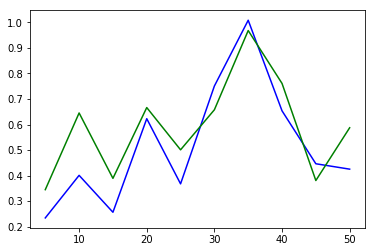

In [210]:
mse = np.asarray(mse)
mse.shape
plt.figure()
plt.plot(mse[:,0],mse[:,1],'b-',mse[:,0],mse[:,2],'g-')

In [213]:
# make predictions
trainPredictedY = model.predict(xTrain)
testPredictedY = model.predict(xTest)    

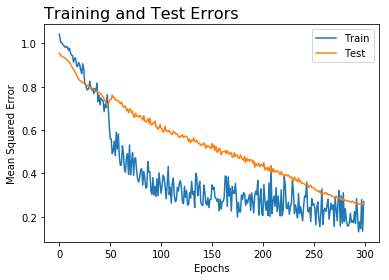

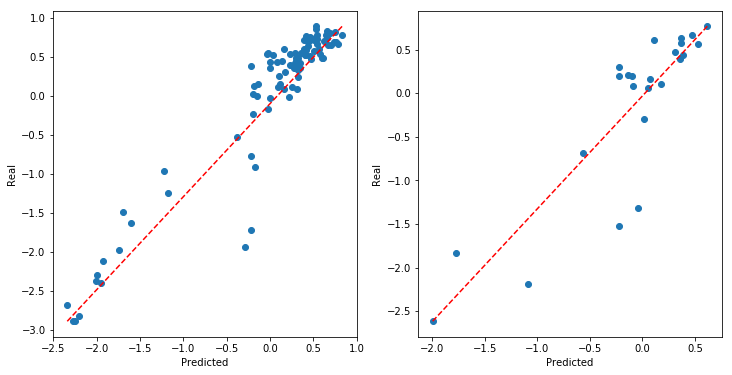

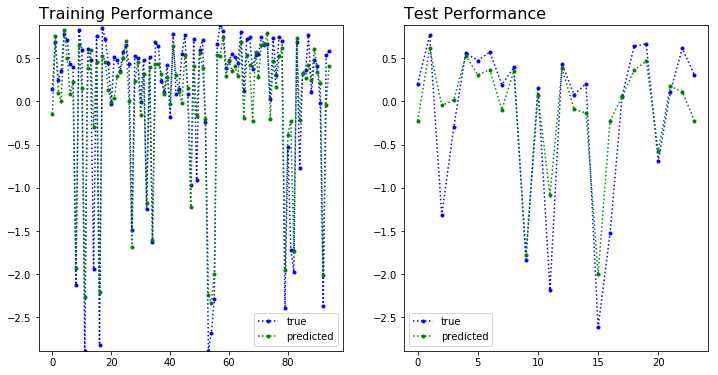

In [216]:

fig = plt.plot(fig_size=(12,6))
plt.plot(f.history['loss'], label='Train')
plt.plot(f.history['val_loss'], label='Test')
plt.title('Training and Test Errors', loc='left', fontsize=16)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#plt.figure()
ax1.scatter(trainPredictedY,yTrain)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Real')
#plt.plot([-2,2],[-2,2])
ax1.plot([trainPredictedY.min(), trainPredictedY.max()], [yTrain.min(), yTrain.max()], color='red', 
         linestyle='--', label='optimal')

#plt.figure()
ax2.scatter(testPredictedY,yTest)
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Real')
#plt.plot([-2,2],[-2,2])
ax2.plot([testPredictedY.min(), testPredictedY.max()], [yTest.min(), yTest.max()], color='red', 
         linestyle='--', label='optimal')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
#plt.figure()
ax1.plot(yTrain,'b.:',label='true')
ax1.plot(trainPredictedY,'g.:',label='predicted')
ax1.set_ylim((yTrain.min(),yTrain.max()))
ax1.set_title('Training Performance', loc='left', fontsize=16)
ax1.legend()

#plt.figure()
ax2.plot(yTest,'b.:',label='true')
ax2.plot(testPredictedY,'g.:',label='predicted')
ax2.set_ylim((yTrain.min(),yTrain.max()))
ax2.set_title('Test Performance', loc='left', fontsize=16)
ax2.legend()

#trainPredict = scaler.inverse_transform(trainPredict)
#yTrain = scaler.inverse_transform([yTrain])
#testPredict = scaler.inverse_transform(testPredict)
#yTest = scaler.inverse_transform([yTest])